In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree
import seaborn as sns
from sklearn.datasets import make_blobs, make_classification
from sklearn.tree import DecisionTreeRegressor


In [145]:
#Decision Tree

In [146]:
data_train = pd.read_csv('train_clean.csv')

In [147]:
data_train.columns

Index(['Id', 'price', 'name', 'host_id', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_listings_count', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'beds', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'description_length', 'host_l

In [148]:
selected_features = [col for col in data_train.columns if col not in ['Id','name','host_response_time',
    'room_type',
    'property_type',
    'neighbourhood_cleansed']]

X = data_train[selected_features]

In [149]:
y = data_train['price']

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=999)

In [151]:
reg = DecisionTreeRegressor(max_depth=7, min_samples_split=20, random_state=5)

In [152]:
cv_scores = cross_val_score(reg, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

mae_cv = -cv_scores.mean()
print("Mean Absolute Error (Cross-Validation):", mae_cv)

reg.fit(X_train, y_train)


Mean Absolute Error (Cross-Validation): 19.717713287702793


DecisionTreeRegressor(max_depth=7, min_samples_split=20, random_state=5)

[Text(0.7542372881355932, 0.9375, 'price <= 22143.0\nsquared_error = 2103926.107\nsamples = 11454\nvalue = 281.879'),
 Text(0.7372881355932204, 0.8125, 'price <= 5250.0\nsquared_error = 485745.292\nsamples = 11445\nvalue = 247.151'),
 Text(0.5254237288135594, 0.6875, 'price <= 704.5\nsquared_error = 66791.226\nsamples = 11399\nvalue = 207.567'),
 Text(0.2711864406779661, 0.5625, 'price <= 245.5\nsquared_error = 15431.167\nsamples = 11026\nvalue = 172.632'),
 Text(0.13559322033898305, 0.4375, 'price <= 131.5\nsquared_error = 2982.625\nsamples = 8708\nvalue = 119.916'),
 Text(0.06779661016949153, 0.3125, 'price <= 83.5\nsquared_error = 748.618\nsamples = 5392\nvalue = 83.501'),
 Text(0.03389830508474576, 0.1875, 'price <= 58.5\nsquared_error = 219.854\nsamples = 2664\nvalue = 59.982'),
 Text(0.01694915254237288, 0.0625, 'squared_error = 80.035\nsamples = 1151\nvalue = 45.712'),
 Text(0.05084745762711865, 0.0625, 'squared_error = 53.458\nsamples = 1513\nvalue = 70.837'),
 Text(0.101694915

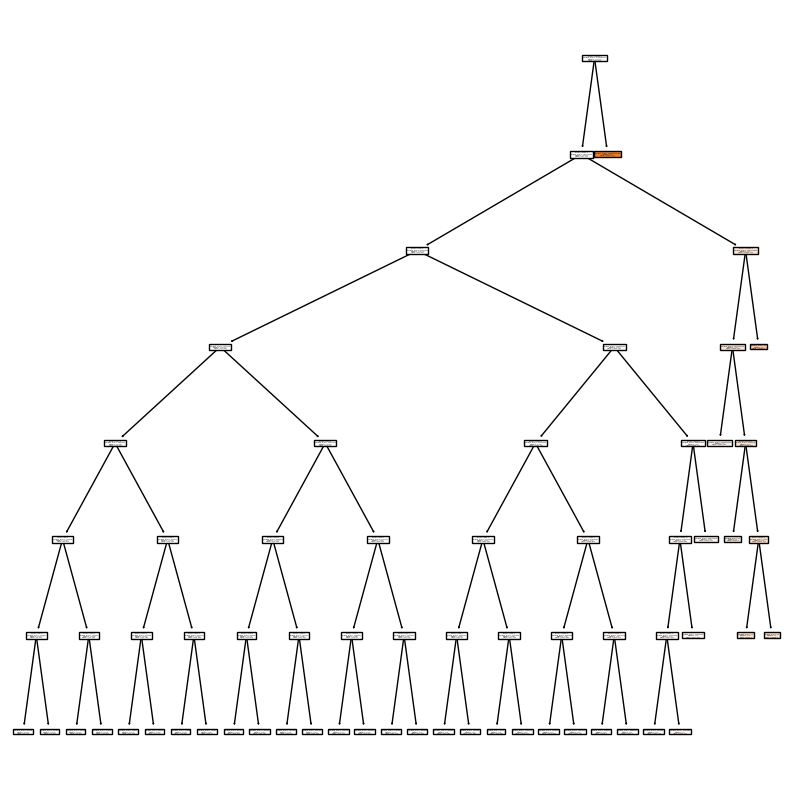

In [153]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10))
tree.plot_tree(reg, 
               feature_names=list(X.columns),
              filled=True)

In [154]:
data_test = pd.read_csv('test_clean.csv')

selected_features = [col for col in data_test.columns if col not in ['Id','name','host_response_time',
    'room_type',
    'property_type',
    'neighbourhood_cleansed']]

data_test = data_test[selected_features]

In [155]:
predictions = reg.predict(data_test)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- price


In [ ]:
#results = pd.DataFrame({'Id': data_test['Id'], 'price': predictions})
#results

NameError: name 'predictions' is not defined

In [ ]:
#results.to_csv('predictions_tree_with_ids.csv', index=False, header=['id', 'price'])